In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
data = pd.read_csv(r"kamila\subj-1_ses-S001_task-kamila_pomiar1_run-001_20241116_230805_eeg_BA_MINI_023_7c8c5f9b-d471-4fcb-8a61-0c0db6d54a8c-raw.csv")

In [3]:
data

,Unnamed: 0,time,F3,F4,C3,C4,P3,P4,O1,O2,Accel_x,Accel_y,Accel_z,Sample,Streaming,Battery
0,0,0.000,0.238765,0.190077,0.187943,0.182216,0.309259,0.453762,0.330163,0.562500,5.201447,7.993401,0.420705,119525.0,1.0,97.0
1,1,0.004,0.238768,0.190083,0.187952,0.182215,0.309261,0.453767,0.330163,0.562500,5.201447,7.993401,0.420705,119526.0,1.0,97.0
2,2,0.008,0.238761,0.190081,0.187948,0.182203,0.309257,0.453771,0.330161,0.562500,5.201447,7.993401,0.420705,119527.0,1.0,97.0
3,3,0.012,0.238756,0.190081,0.187943,0.182191,0.309254,0.453777,0.330160,0.562500,5.201447,7.993401,0.420705,119528.0,1.0,97.0
4,4,0.016,0.238764,0.190091,0.187950,0.182189,0.309257,0.453789,0.330157,0.562500,5.201447,7.993401,0.420705,119529.0,1.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911795,911795,3647.180,0.261986,0.262042,0.262022,0.261824,0.262162,0.262034,0.262030,0.262057,0.726673,9.484992,-0.497197,1031320.0,1.0,89.0
911796,911796,3647.184,0.261987,0.262043,0.262024,0.261826,0.262163,0.262035,0.262031,0.262058,0.726673,9.484992,-0.497197,1031321.0,1.0,89.0
911797,911797,3647.188,0.261986,0.262042,0.262023,0.261825,0.262162,0.262034,0.262030,0.262057,0.726673,9.484992,-0.497197,1031322.0,1.0,89.0
911798,911798,3647.192,0.261985,0.262041,0.262022,0.261824,0.262162,0.262033,0.262029,0.262056,0.726673,9.484992,-0.497197,1031323.0,1.0,89.0


In [4]:
data.drop(columns=['Unnamed: 0'])

,time,F3,F4,C3,C4,P3,P4,O1,O2,Accel_x,Accel_y,Accel_z,Sample,Streaming,Battery
0,0.000,0.238765,0.190077,0.187943,0.182216,0.309259,0.453762,0.330163,0.562500,5.201447,7.993401,0.420705,119525.0,1.0,97.0
1,0.004,0.238768,0.190083,0.187952,0.182215,0.309261,0.453767,0.330163,0.562500,5.201447,7.993401,0.420705,119526.0,1.0,97.0
2,0.008,0.238761,0.190081,0.187948,0.182203,0.309257,0.453771,0.330161,0.562500,5.201447,7.993401,0.420705,119527.0,1.0,97.0
3,0.012,0.238756,0.190081,0.187943,0.182191,0.309254,0.453777,0.330160,0.562500,5.201447,7.993401,0.420705,119528.0,1.0,97.0
4,0.016,0.238764,0.190091,0.187950,0.182189,0.309257,0.453789,0.330157,0.562500,5.201447,7.993401,0.420705,119529.0,1.0,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911795,3647.180,0.261986,0.262042,0.262022,0.261824,0.262162,0.262034,0.262030,0.262057,0.726673,9.484992,-0.497197,1031320.0,1.0,89.0
911796,3647.184,0.261987,0.262043,0.262024,0.261826,0.262163,0.262035,0.262031,0.262058,0.726673,9.484992,-0.497197,1031321.0,1.0,89.0
911797,3647.188,0.261986,0.262042,0.262023,0.261825,0.262162,0.262034,0.262030,0.262057,0.726673,9.484992,-0.497197,1031322.0,1.0,89.0
911798,3647.192,0.261985,0.262041,0.262022,0.261824,0.262162,0.262033,0.262029,0.262056,0.726673,9.484992,-0.497197,1031323.0,1.0,89.0


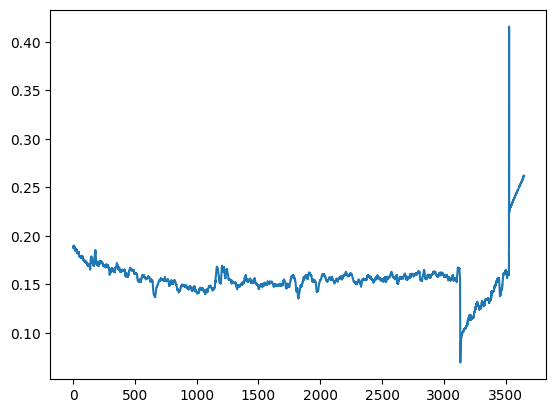

In [5]:
plt.plot(data['time'], data['C3'])

In [6]:
print(data)

        Unnamed: 0      time        F3        F4        C3        C4  \
0                0     0.000  0.238765  0.190077  0.187943  0.182216   
1                1     0.004  0.238768  0.190083  0.187952  0.182215   
2                2     0.008  0.238761  0.190081  0.187948  0.182203   
3                3     0.012  0.238756  0.190081  0.187943  0.182191   
4                4     0.016  0.238764  0.190091  0.187950  0.182189   
...            ...       ...       ...       ...       ...       ...   
911795      911795  3647.180  0.261986  0.262042  0.262022  0.261824   
911796      911796  3647.184  0.261987  0.262043  0.262024  0.261826   
911797      911797  3647.188  0.261986  0.262042  0.262023  0.261825   
911798      911798  3647.192  0.261985  0.262041  0.262022  0.261824   
911799      911799  3647.196  0.261988  0.262044  0.262025  0.261827   

              P3        P4        O1        O2   Accel_x   Accel_y   Accel_z  \
0       0.309259  0.453762  0.330163  0.562500  5.20144

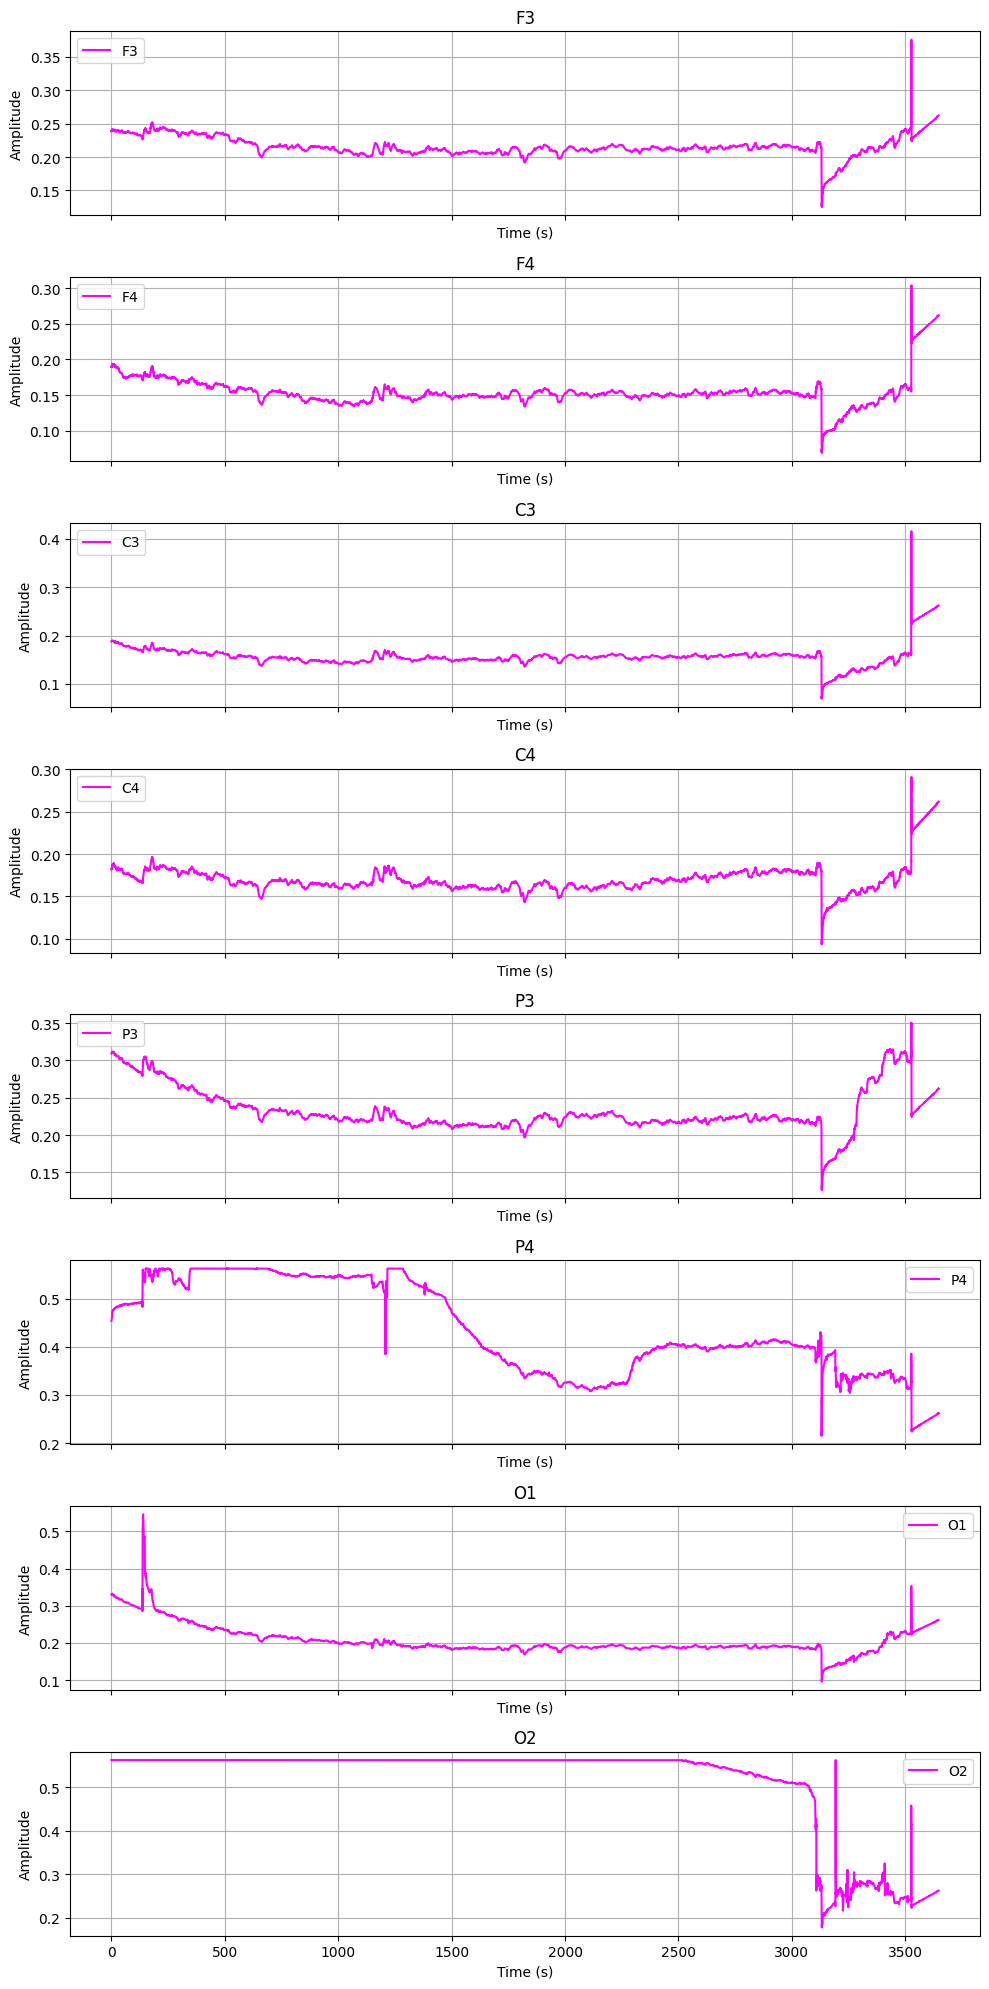

In [7]:
columns_to_plot = ['F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20), sharex=True)

for i, col in enumerate(columns_to_plot):
    axes[i].plot(data['time'], data[col], label=col, color='magenta')
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Time (s)")
    axes[i].set_ylabel("Amplitude")
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()

plt.show()

In [8]:
def butter_filter(data, lowcut=None, highcut=None, fs=250, order=4):
    nyquist = 0.5 * fs
    b, a = None, None

    if lowcut and highcut:
        low = lowcut / nyquist
        high = highcut / nyquist
        b, a = butter(order, [low, high], btype='band')
    elif lowcut:
        low = lowcut / nyquist
        b, a = butter(order, low, btype='high')
    elif highcut:
        high = highcut / nyquist
        b, a = butter(order, high, btype='low')

    if b is not None and a is not None:
        return filtfilt(b, a, data)
    return data

fs = 250 
lowcut = 1  
highcut = 30

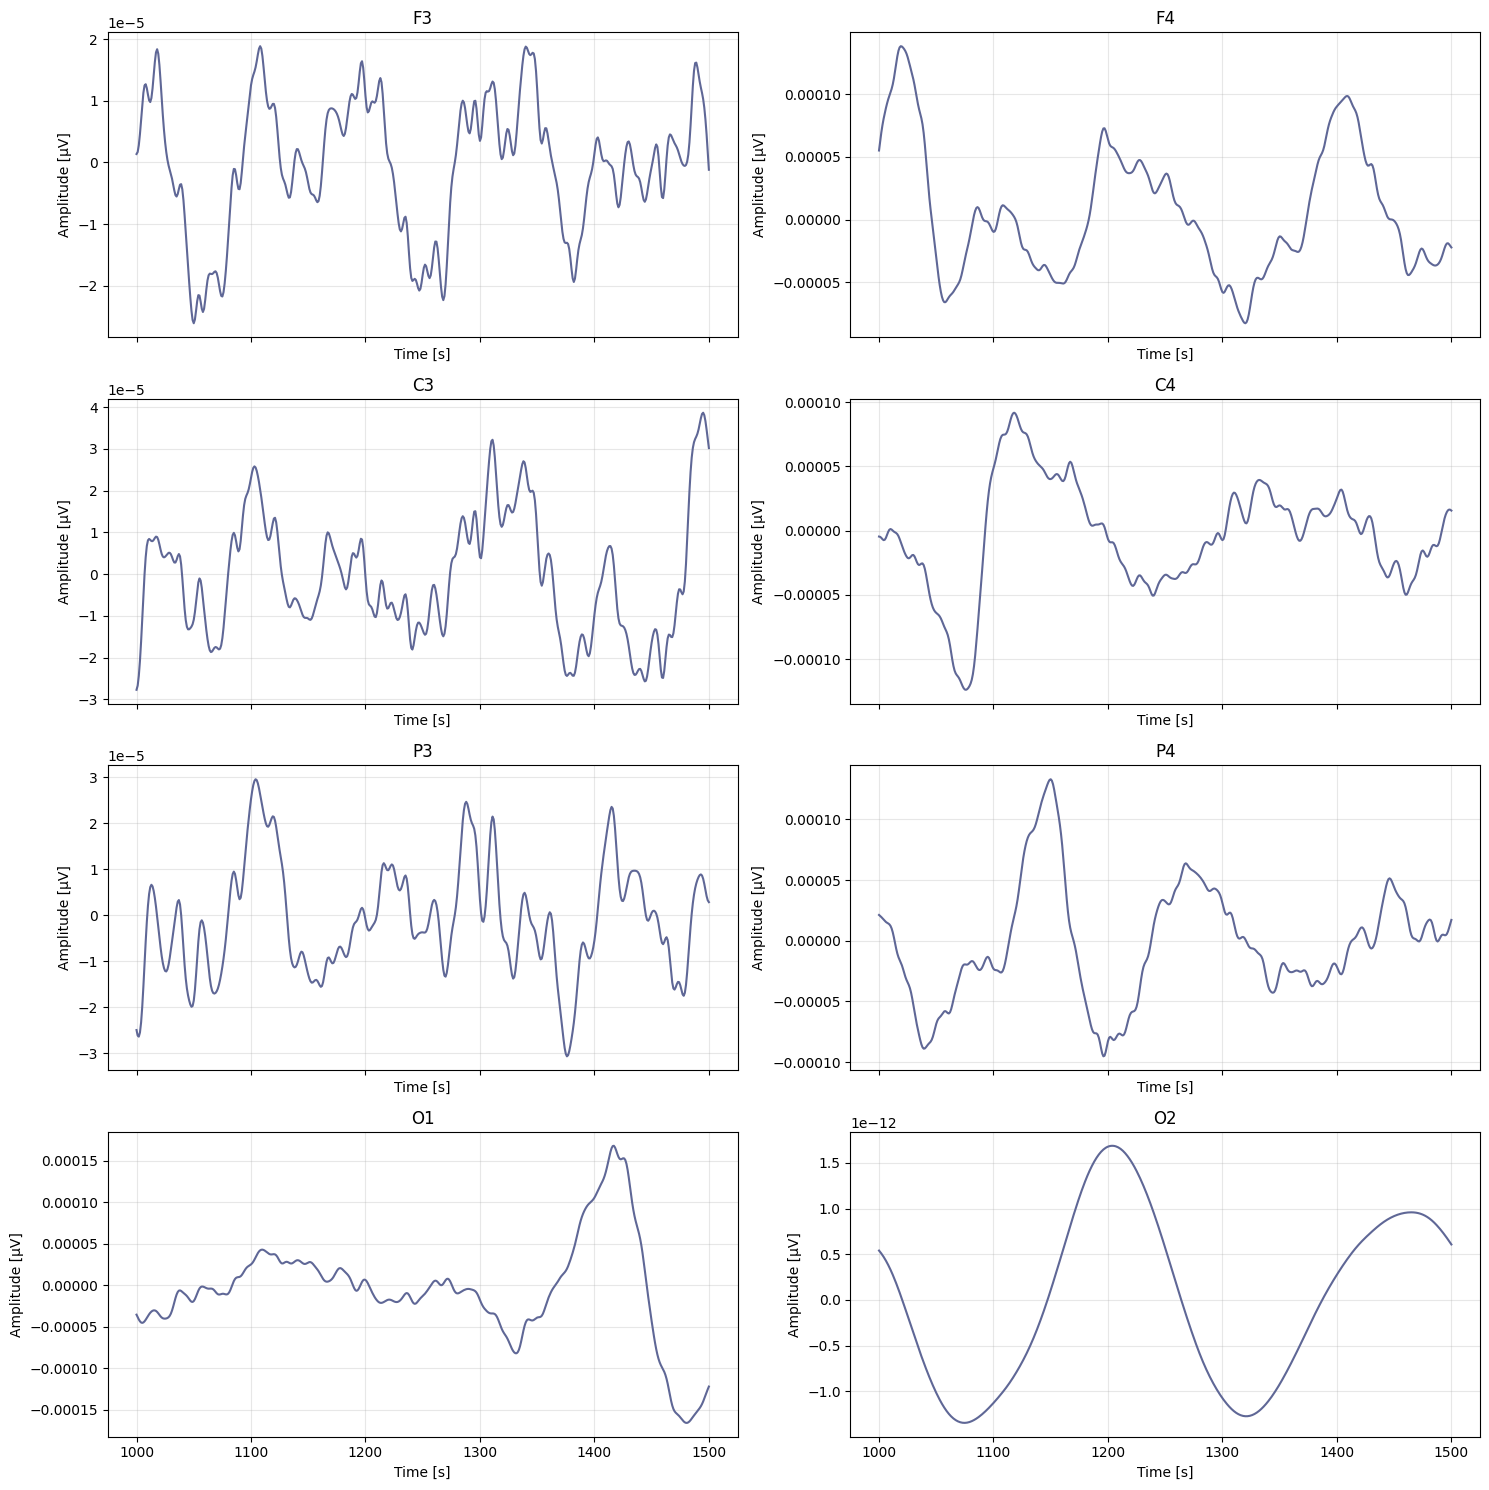

In [9]:
for col in columns_to_plot:
    data[col] = butter_filter(data[col], lowcut=lowcut, highcut=highcut, fs=fs)

n_cols = 2
n_rows = -(-len(columns_to_plot) // n_cols) 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15), sharex=True)

axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].plot(data['time'][1000:1501]*250, data[col][1000:1501], label=col, color='#5F6796')
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("Time [s]")
    axes[i].set_ylabel("Amplitude [μV]")
    axes[i].grid(alpha=0.3)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
